In [1]:
# import general stuff
import os
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
import pickle

# importing own stuff
import utils as ut
from ddpg_agent import Agent
from ddpg_agent import ReplayBuffer

### plot the main results

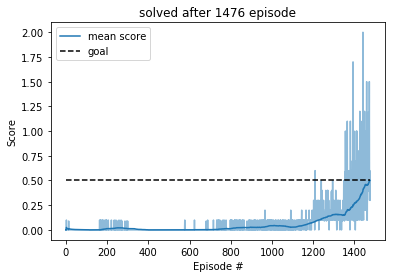

In [7]:
with open('./data/scores_MADDPG_episodes2000_0.pkl', 'rb') as f:
    scores = pickle.load(f)

scores_ma = ut.moving_average(scores)
h = plt.plot(scores, alpha=0.5)
plt.plot(scores_ma, label='mean score', c=h[-1].get_color())
plt.plot([0, len(scores)], [0.5, 0.5], 'k--', label='goal')
plt.legend(loc='best')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title('solved after {} episode'.format(len(scores)))
plt.savefig('./data/MADDPG_results_report.png')
plt.show()

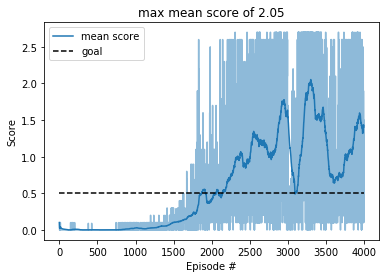

In [3]:
with open('./data/scores_MADDPG_episodes4000_1.pkl', 'rb') as f:
    scores = pickle.load(f)

scores_ma = ut.moving_average(scores)
h = plt.plot(scores, alpha=0.5)
plt.plot(scores_ma, label='mean score', c=h[-1].get_color())
plt.plot([0, len(scores)], [0.5, 0.5], 'k--', label='goal')
plt.legend(loc='best')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title('max mean score of {:.2f}'.format(np.max(scores_ma)))
plt.savefig('./data/MADDPG_maxScore_report.png')
plt.show()

### Do some time analysis for softupdate, that is the Tau value

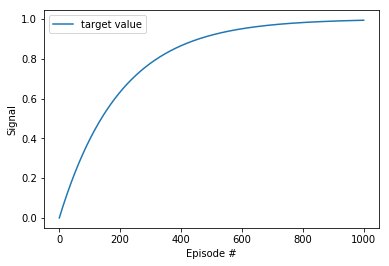

In [4]:
TAU = 0.005               # for soft update of target parameters
nEpisodes = 1000

# start value and input value
y,c,a = [], [], []
y.append(0) # initial value

u = 1       # input value
for i in range(nEpisodes):
    y.append((1-TAU)*y[-1] + TAU*u) 

plt.plot(y, label='target value')
plt.legend(loc='best')
plt.ylabel('Signal')
plt.xlabel('Episode #')
plt.show()


### Analyze noise for exploration

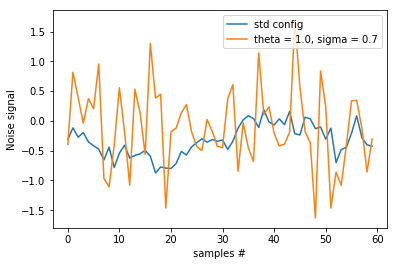

In [5]:
from ddpg_agent import OUNoise
import random
random_seed = 123

# Noise process
# mu=0., theta=0.15, sigma=0.2
# mu is the center point of the distribution
# theta draws the distribution towards the center point
# sigma draws the distribution towards random points of normal distribution
noise_std = OUNoise(1, random_seed)
THETA = 1.0
SIGMA = 0.7
noise_1 = OUNoise(1, random_seed, 0., THETA, SIGMA)

# create noise
n_samples = 60
noise_signal_std = [noise_std.sample() for i in range(n_samples)]
noise_signal_1 = [noise_1.sample() for i in range(n_samples)]

plt.plot(noise_signal_std, label='std config')
plt.plot(noise_signal_1, label='theta = {}, sigma = {}'.format(THETA,SIGMA))
plt.legend(loc='best')
plt.ylabel('Noise signal')
plt.xlabel('samples #')
plt.show()

### save trained agents

In [6]:
state_size = 24
action_size = 2
num_agents = 2
memory = ReplayBuffer(action_size, int(5e5), 512, 321)    # as no training in this section, just a dummy

agents = ut.load_agents(state_size, action_size, num_agents, memory)
# ut.save_agenttrained(state_size, action_size, agents) # save agent networks